In [1]:
#

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath

In [2]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:42823 Dashboard: /proxy/45557/status,Cluster Workers: 8 Cores: 8 Memory: 100.00 GiB


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

ee = explore.ExperimentExplorer(session=session, experiment='01deg_jra55v140_iaf')
ee

In [54]:
expt='01deg_jra55v140_iaf_cycle3'
start = '2010-01-01 00:00:00'
end = '2018-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-40)).sel(xt_ocean=slice(-260,-210)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
                                                                                                                     
temp.load()

<xarray.DataArray 'temp' (st_ocean: 75, yt_ocean: 808, xt_ocean: 500)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [286.033  , 286.03494, 286.03683, ..., 290.35843, 290.3423 ,
         290.32574],
        [286.0688 , 286.0735 , 286.0779 , ..., 290.3892 , 290.3721 ,
         290.35837],
        [286.1046 , 286.10983, 286.1177 , ..., 290.41678, 290.40268,
         290.3886 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -259.9 -259.8 -259.7 ... -210.2 -210.1 -210.0
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -40.18 -40.11 -40.03
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03

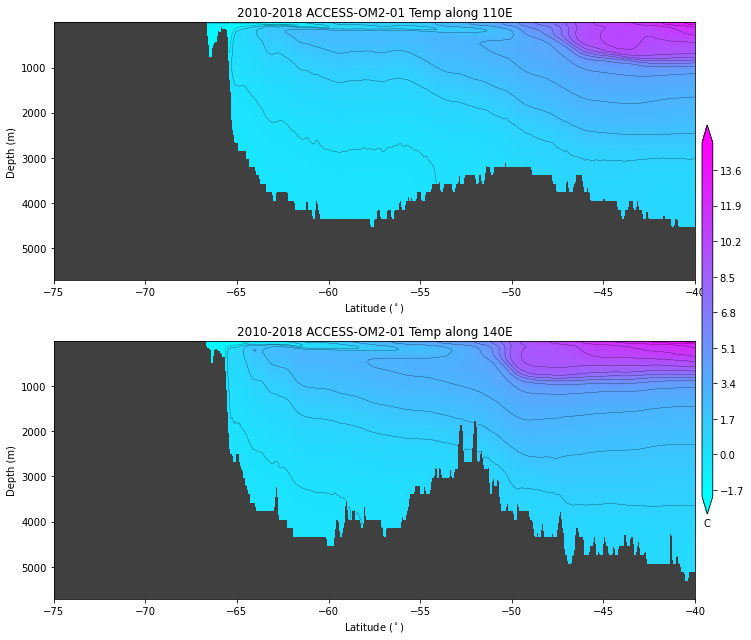

In [55]:
fig = plt.figure(figsize=(10, 9))

clev = np.arange(-2,15,.1)
clev2 = np.arange(-2,15,1)

lon1=-250
lon2=-220

var=temp.sel(xt_ocean=lon1, method='nearest')-273.13

plt.subplot(2,1,1)
plt.gca().patch.set_color('.25')
plt.contourf(var.yt_ocean,var.st_ocean,var,levels=clev,cmap=plt.cm.cool,colobar=False,extend='both')
plt.contour(var.yt_ocean,var.st_ocean,var,levels=clev2,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
plt.title('2010-2018 ACCESS-OM2-01 Temp along 110E')

var=temp.sel(xt_ocean=lon2, method='nearest')-273.13

plt.subplot(2,1,2)
plt.gca().patch.set_color('.25')
plt.contourf(var.yt_ocean,var.st_ocean,var,levels=clev,cmap=plt.cm.cool,colobar=False,extend='both')
plt.contour(var.yt_ocean,var.st_ocean,var,levels=clev2,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
plt.title('2010-2018 ACCESS-OM2-01 Temp along 140E')

#horiz, vert, width,height
ax = plt.axes([0.98,0.2,0.015,0.6])
cb = plt.colorbar(p1,cax=ax,orientation='vertical',shrink=0.7)
cb.ax.set_xlabel('C')

plt.tight_layout()